## News dataset

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.5)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [3]:
# import data
dir= 'csv/news/'

mle_lm_path  = dir+'run_best_mle_TB-tag-eval_lm_score.csv'
mle_rlm_path = dir+'run_best_mle_TB-tag-eval_rlm_score.csv'

seqgan_mix_beta0_mti0_lm_path  = dir+'run_seqgan_mix_beta0_mti0_TB-tag-eval_lm_score.csv'
seqgan_mix_beta0_mti0_rlm_path = dir+'run_seqgan_mix_beta0_mti0_TB-tag-eval_rlm_score.csv'

seqgan_lm_beta0_mti0_lm_path  = dir+'run_seqgan_lm_beta0_mti0_TB-tag-eval_lm_score.csv'
seqgan_lm_beta0_mti0_rlm_path = dir+'run_seqgan_lm_beta0_mti0_TB-tag-eval_rlm_score.csv'

seqgan_mix_beta0_mti1_lm_path  = dir+'run_seqgan_mix_beta0_mti1_TB-tag-eval_lm_score.csv'
seqgan_mix_beta0_mti1_rlm_path = dir+'run_seqgan_mix_beta0_mti1_TB-tag-eval_rlm_score.csv'

stepgan_lm_beta0_mti1_lm_path  = dir+'run_stepgan_lm_beta0_mti1_TB-tag-eval_lm_score.csv'
stepgan_lm_beta0_mti1_rlm_path = dir+'run_stepgan_lm_beta0_mti1_TB-tag-eval_rlm_score.csv'

gan_lm_beta1_mti0_lm_path  = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta1_mti0_rlm_path = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_rlm_score.csv'



In [4]:
mle_lm = pd.read_csv(mle_lm_path).drop_duplicates('Step')
mle_rlm = pd.read_csv(mle_rlm_path).drop_duplicates('Step')

seqgan_mix_beta0_mti0_lm  = pd.read_csv(seqgan_mix_beta0_mti0_lm_path).drop_duplicates('Step')
seqgan_mix_beta0_mti0_rlm = pd.read_csv(seqgan_mix_beta0_mti0_rlm_path).drop_duplicates('Step')

seqgan_lm_beta0_mti0_lm  = pd.read_csv(seqgan_lm_beta0_mti0_lm_path).drop_duplicates('Step')
seqgan_lm_beta0_mti0_rlm = pd.read_csv(seqgan_lm_beta0_mti0_rlm_path).drop_duplicates('Step')

seqgan_mix_beta0_mti1_lm  = pd.read_csv(seqgan_mix_beta0_mti1_lm_path).drop_duplicates('Step')
seqgan_mix_beta0_mti1_rlm = pd.read_csv(seqgan_mix_beta0_mti1_rlm_path).drop_duplicates('Step')

stepgan_lm_beta0_mti1_lm  = pd.read_csv(stepgan_lm_beta0_mti1_lm_path).drop_duplicates('Step')
stepgan_lm_beta0_mti1_rlm = pd.read_csv(stepgan_lm_beta0_mti1_rlm_path).drop_duplicates('Step')

gan_lm_beta1_mti0_lm  = pd.read_csv(gan_lm_beta1_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta1_mti0_rlm = pd.read_csv(gan_lm_beta1_mti0_rlm_path).drop_duplicates('Step')


### show graphs

In [5]:
plt.rcParams['lines.markersize'] ** 2

36.0

In [6]:
plt.rcParams['lines.markersize'] ** 2
size = [50.0]*len(seqgan_mix_beta0_mti0_lm.Value)
bsize = 200

def get_size(pd_):
    size = [50] * len(pd_.Value)
    size[pd_[pd_.Step == 100].index[0]] = 200
    return size

def get_ec(c, pd_):
    ec  = [c] * len(pd_.Value)
    ec[pd_[pd_.Step == 100].index[0]] = 'k'
    return ec

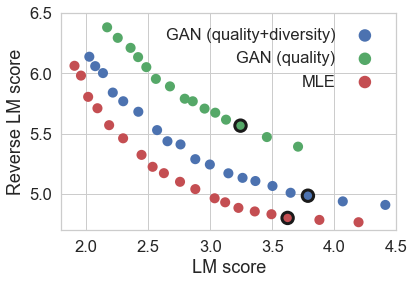

In [8]:
size_ = size
size_[seqgan_mix_beta0_mti0_lm[seqgan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(seqgan_mix_beta0_mti0_lm.Value, \
            seqgan_mix_beta0_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, edgecolor=get_ec('b', seqgan_mix_beta0_mti0_rlm), linewidth=3)


size_ = size
size_[seqgan_lm_beta0_mti0_lm[seqgan_lm_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(seqgan_lm_beta0_mti0_lm.Value[:-4], \
            seqgan_lm_beta0_mti0_rlm.Value[:-4], \
            c='g',
            label='GAN (quality)',
            s=size_, edgecolor=get_ec('g', seqgan_lm_beta0_mti0_lm), linewidth=3)


size_ = size
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size, edgecolor=get_ec('r', mle_rlm), linewidth=3)

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.8, 4.5, 4.7, 6.5])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('figs/news_lm_rlm_temperature_mti0.png', bbox_inches='tight')
plt.show()


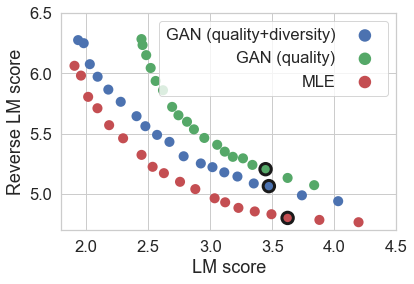

In [10]:

size_ = size
size_[seqgan_mix_beta0_mti1_lm[seqgan_mix_beta0_mti1_lm.Step==100].index[0]] = bsize
plt.scatter(seqgan_mix_beta0_mti1_lm.Value, \
            seqgan_mix_beta0_mti1_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, edgecolor=get_ec('b', seqgan_mix_beta0_mti1_rlm), linewidth=3)

size_ = size
size_[stepgan_lm_beta0_mti1_lm[stepgan_lm_beta0_mti1_lm.Step==100].index[0]] = bsize
plt.scatter(stepgan_lm_beta0_mti1_lm.Value, \
            stepgan_lm_beta0_mti1_rlm.Value, \
            c='g',
            label='GAN (quality)',
            s=size_, edgecolor=get_ec('g', stepgan_lm_beta0_mti1_rlm), linewidth=3)

size_ = size
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, edgecolor=get_ec('r', mle_rlm), linewidth=3)

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.8, 4.5, 4.7, 6.5])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False)
plt.savefig('figs/news_lm_rlm_temperature_mti1.png', bbox_inches='tight')
plt.show()

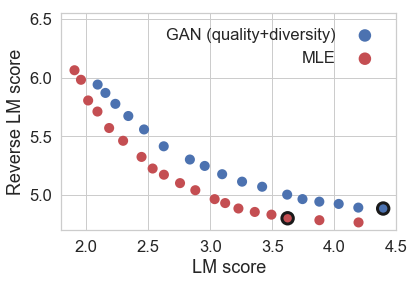

In [12]:
size_ = size
size_[gan_lm_beta1_mti0_lm[gan_lm_beta1_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(gan_lm_beta1_mti0_lm.Value, \
            gan_lm_beta1_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, edgecolor=get_ec('b', gan_lm_beta1_mti0_lm), linewidth=3)

size_ = size
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, 
            edgecolor=get_ec('r', mle_rlm), linewidth=3)
            



#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([1.8, 4.5, 4.7, 6.55])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('figs/news_lm_rlm_temperature_beta1.png', bbox_inches='tight')
plt.show()

## COCO dataset

In [14]:
# import data
dir= 'csv/coco/'

mle_lm_path  = dir+'run_best_mle_TB-tag-eval_lm_score.csv'
mle_rlm_path = dir+'run_best_mle_TB-tag-eval_rlm_score.csv'

gan_mix_beta0_mti0_lm_path  = dir+'run_gan_mix_beta0_mti0_TB-tag-eval_lm_score.csv'
gan_mix_beta0_mti0_rlm_path = dir+'run_gan_mix_beta0_mti0_TB-tag-eval_rlm_score.csv'

gan_lm_beta0_mti0_lm_path  = dir+'run_gan_lm_beta0_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta0_mti0_rlm_path = dir+'run_gan_lm_beta0_mti0_TB-tag-eval_rlm_score.csv'

gan_mix_beta0_mti1_lm_path  = dir+'run_gan_mix_beta0_mti1_TB-tag-eval_lm_score.csv'
gan_mix_beta0_mti1_rlm_path = dir+'run_gan_mix_beta0_mti1_TB-tag-eval_rlm_score.csv'

gan_lm_beta0_mti1_lm_path  = dir+'run_gan_lm_beta0_mti1_TB-tag-eval_lm_score.csv'
gan_lm_beta0_mti1_rlm_path = dir+'run_gan_lm_beta0_mti1_TB-tag-eval_rlm_score.csv'


gan_mix_beta1_mti0_lm_path  = dir+'run_gan_mix_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_mix_beta1_mti0_rlm_path = dir+'run_gan_mix_beta1_mti0_TB-tag-eval_rlm_score.csv'

gan_lm_beta1_mti0_lm_path  = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_lm_score.csv'
gan_lm_beta1_mti0_rlm_path = dir+'run_gan_lm_beta1_mti0_TB-tag-eval_rlm_score.csv'




In [15]:
mle_lm = pd.read_csv(mle_lm_path).drop_duplicates('Step')
mle_rlm = pd.read_csv(mle_rlm_path).drop_duplicates('Step')

gan_mix_beta0_mti0_lm  = pd.read_csv(gan_mix_beta0_mti0_lm_path).drop_duplicates('Step')
gan_mix_beta0_mti0_rlm = pd.read_csv(gan_mix_beta0_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta0_mti0_lm  = pd.read_csv(gan_lm_beta0_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta0_mti0_rlm = pd.read_csv(gan_lm_beta0_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

# gan_mix_beta0_mti1_lm  = pd.read_csv(gan_mix_beta0_mti1_lm_path).drop_duplicates('Step')
# gan_mix_beta0_mti1_rlm = pd.read_csv(gan_mix_beta0_mti1_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta0_mti1_lm  = pd.read_csv(gan_lm_beta0_mti1_lm_path).drop_duplicates('Step')
gan_lm_beta0_mti1_rlm = pd.read_csv(gan_lm_beta0_mti1_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_mix_beta1_mti0_lm  = pd.read_csv(gan_mix_beta1_mti0_lm_path).drop_duplicates('Step')
gan_mix_beta1_mti0_rlm = pd.read_csv(gan_mix_beta1_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')

gan_lm_beta1_mti0_lm  = pd.read_csv(gan_lm_beta1_mti0_lm_path).drop_duplicates('Step')
gan_lm_beta1_mti0_rlm = pd.read_csv(gan_lm_beta1_mti0_rlm_path).drop_duplicates('Step').sort_values('Step')


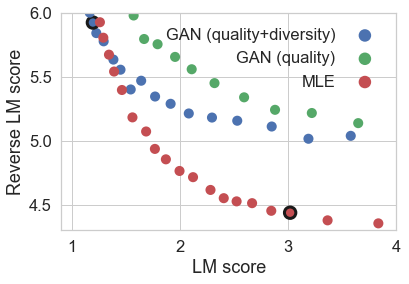

In [16]:
size_ = [50]*len(gan_mix_beta0_mti0_lm)
size_[gan_mix_beta0_mti0_lm[gan_mix_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(gan_mix_beta0_mti0_lm.Value, \
            gan_mix_beta0_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, 
            edgecolor=get_ec('b', gan_mix_beta0_mti0_rlm), linewidth=3)

size_ = [50]*len(gan_lm_beta0_mti0_lm)
size_[gan_lm_beta0_mti0_lm[gan_lm_beta0_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(gan_lm_beta0_mti0_lm.Value, \
            gan_lm_beta0_mti0_rlm.Value, \
            c='g',
            label='GAN (quality)',
            s=size_, 
            edgecolor=get_ec('g', gan_lm_beta0_mti0_rlm), linewidth=3)

size_ = [50]*len(mle_lm)
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, 
            edgecolor=get_ec('r', mle_lm), linewidth=3)


#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4, 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')

plt.legend(markerfirst=False, frameon=False)
plt.savefig('figs/coco_lm_rlm_temperature_mti0.png', bbox_inches='tight')
plt.show()

In [24]:
mle_lm

,Wall time,Step,Value
0,1.535766e+09,90,3.834284
1,1.535766e+09,95,3.364213
2,1.535767e+09,100,3.017437
3,1.535767e+09,103,2.842850
4,1.535767e+09,106,2.665168
5,1.535768e+09,109,2.521796
6,1.535768e+09,112,2.402766
7,1.535768e+09,114,2.280059
8,1.535769e+09,120,2.118340
9,1.535769e+09,125,1.993249


In [23]:
mle_rlm

,Wall time,Step,Value
0,1.535761e+09,90,4.354239
2,1.535767e+09,95,4.377853
3,1.535767e+09,100,4.437588
4,1.535767e+09,103,4.452505
5,1.535768e+09,106,4.512189
6,1.535768e+09,109,4.526206
7,1.535768e+09,112,4.551165
8,1.535769e+09,114,4.615561
9,1.535769e+09,120,4.715398
10,1.535769e+09,125,4.763866


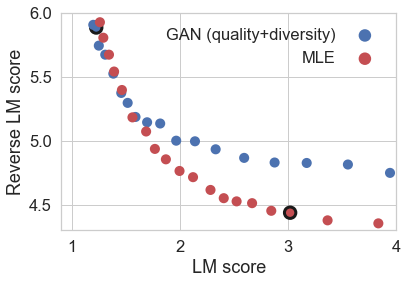

In [25]:
size_ = [50]*len(gan_lm_beta0_mti1_lm)
size_[gan_lm_beta0_mti1_lm[gan_lm_beta0_mti1_lm.Step==100].index[0]] = bsize
plt.scatter(gan_lm_beta0_mti1_lm.Value, \
            gan_lm_beta0_mti1_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, 
            edgecolor=get_ec('b', gan_lm_beta0_mti1_rlm), linewidth=3)

size_ = [50]*len(mle_lm)
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, 
            edgecolor=get_ec('r', mle_lm), linewidth=3)




# plt.scatter(gan_lm_beta0_mti1_lm.Value, \
#             gan_lm_beta0_mti1_rlm.Value, \
#             c='g',
#             label='GAN (quality)')

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4., 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('figs/coco_lm_rlm_temperature_mti1.png', bbox_inches='tight')
plt.show()

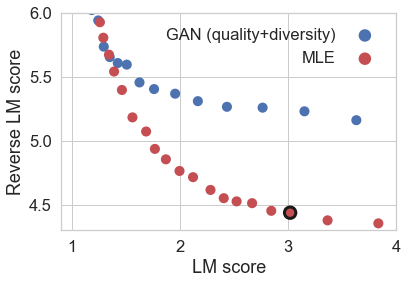

In [26]:
size_ = [50]*len(gan_lm_beta1_mti0_lm)
size_[gan_lm_beta1_mti0_lm[gan_lm_beta1_mti0_lm.Step==100].index[0]] = bsize
plt.scatter(gan_mix_beta1_mti0_lm.Value, \
            gan_mix_beta1_mti0_rlm.Value, \
            c='b',
            label='GAN (quality+diversity)',
            s=size_, 
            edgecolor=get_ec('b', gan_mix_beta1_mti0_lm), linewidth=3)

size_ = [50]*len(mle_lm)
size_[mle_lm[mle_lm.Step==100].index[0]] = bsize
plt.scatter(mle_lm.Value, \
            mle_rlm.Value, \
            c='r',
            label='MLE',
            s=size_, 
            edgecolor=get_ec('r', mle_lm), linewidth=3)

#plt.colorbar(sc)
plt.xlabel('LM score')
plt.ylabel('Reverse LM score')
plt.axis([0.9, 4., 4.3, 6])
# plt.title('MLE (red) vs GAN (blue)')
plt.legend(markerfirst=False, frameon=False)
plt.savefig('figs/coco_lm_rlm_temperature_beta1.png' , bbox_inches='tight')
plt.show()

## argument for quality/diversity w.r.t temperatures 

In [131]:
sns.set(font_scale=2)  # Make sure everything is readable.
sns.set_style("whitegrid")

In [132]:
model1_lm = mle_lm.Value[:-2]
model1_rlm = mle_rlm.Value[:-2]

model2_lm = model1_lm
model2_rlm = model1_rlm

model2_lm = [ x-0.6 for x in model2_lm ]
model1_rlm = [ x-0.6 for x in model1_rlm ]

model3_lm = model1_lm
model3_rlm = model1_rlm

model4_lm  = model2_lm
model4_rlm = model2_rlm



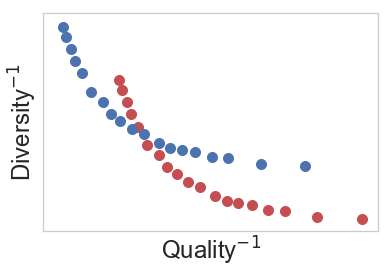

In [133]:
plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=1,
            s=size)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=1,
            s=size)



#plt.colorbar(sc)
plt.xlabel(r'Quality$^{-1}$')
plt.ylabel(r'Diversity$^{-1}$')
plt.xticks([])
plt.yticks([])

plt.savefig('figs/good_eval.png', bbox_inches='tight')
plt.show()

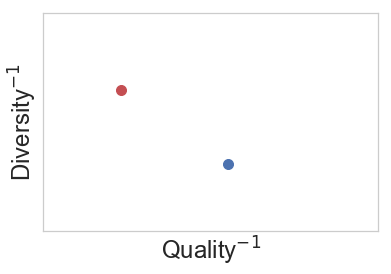

In [134]:
size=100
sns.set_style("whitegrid")

plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=0)

lenght = len(model1_lm)
plt.scatter(model1_lm[lenght-2], 
            model1_rlm[lenght-2], 
            c='r',
            alpha=1,
            s=size)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=0)

plt.scatter(model2_lm[2], 
            model2_rlm[2], 
            c='b',
            alpha=1,
            s=size)


#plt.colorbar(sc)
plt.xlabel(r'Quality$^{-1}$')
plt.ylabel(r'Diversity$^{-1}$')
plt.xticks([])
plt.yticks([])


plt.savefig('figs/bad_eval.png', bbox_inches='tight')
plt.show()

In [135]:
# model2_lm = [ x-0.6 for x in model2_lm ]
# model1_rlm = [ x-0.6 for x in model1_rlm ]

model3_lm = model1_lm
model3_rlm = model1_rlm

model4_lm  = model2_lm
model4_rlm = model2_rlm

model3_rlm = [ x+0.8 for x in model3_rlm ]
model3_lm = [ x-0.3 for x in model3_lm ]

model4_rlm = [ x+0. for x in model4_rlm ]
model4_lm = [ x+0.1 for x in model4_lm ]

# model1_rlm = [ x-0.6 for x in model1_rlm ]


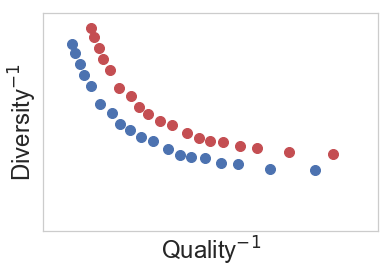

In [136]:
plt.scatter(model1_lm,
            model1_rlm, 
            c='r',
            alpha=0,
            s=size)

plt.scatter(model2_lm, 
            model2_rlm,
            c='b',
            alpha=0,
            s=size)


plt.scatter(model3_lm,
            model3_rlm, 
            c='r',
            alpha=1,
            s=size)

plt.scatter(model4_lm, 
            model4_rlm,
            c='b',
            alpha=1,
            s=size)



#plt.colorbar(sc)
plt.xlabel(r'Quality$^{-1}$')
plt.ylabel(r'Diversity$^{-1}$')
plt.xticks([])
plt.yticks([])

plt.savefig('figs/gooder_eval.png', bbox_inches='tight')
plt.show()